In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [46]:
# positive and negative classes
positive_points = np.array([(-1,3),(0,4),(2,-1)])
negative_points = np.array([(-2,1), (1,-1), (3,-3)])

In [48]:
def plot_data(positive_points, negative_points, title='Positve and Negative classes'):
    """
    Plots positive and negative class data points in a 2D space.

    Parameters:
    - positive_points (ndarray): Array of shape (n,2) containing positive class points.
    - negative_points (ndarray): Array of shape (m,2) containing negative class points.
    - title (str): Title of the plot (default: 'Data Visualization').

    Returns:
    - None (Displays the plot)
    """
    plt.figure(figsize=(8, 6))

    plt.scatter(positive_points[:, 0], positive_points[:, 1], 
                color='blue', marker='o', s=100, edgecolors='k', 
                label='Positive Class')

    plt.scatter(negative_points[:, 0], negative_points[:, 1], 
                color='red', marker='x', s=100, linewidths=2, 
                label='Negative Class')

    plt.xlabel('Feature 1 ($x_1$)', fontsize=12)
    plt.ylabel('Feature 2 ($x_2$)', fontsize=12)
    plt.title(title, fontsize=14)

    plt.legend(loc='best', fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.7)

    plt.show()

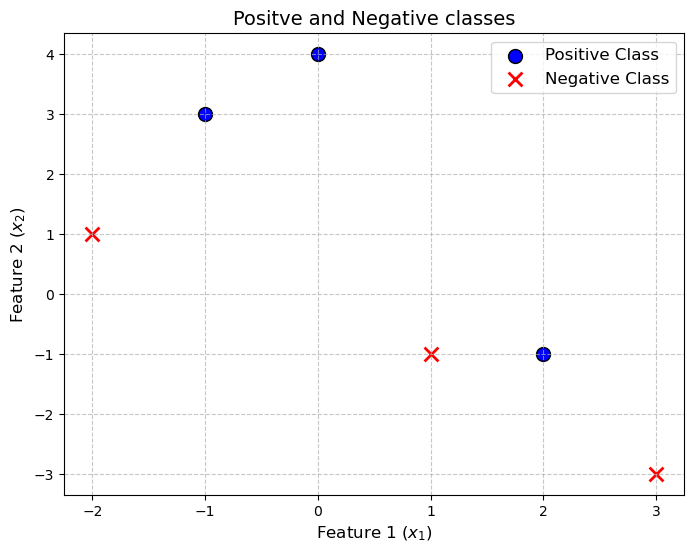

In [49]:
plot_data(positive_points, negative_points)

In [50]:
X = np.vstack((positive_points, negative_points))
y = np.array([1]*len(positive_points) + [-1]*len(negative_points))

In [51]:
X.shape, y.shape

((6, 2), (6,))

In [52]:
def plot_decision_boundary(X, y, theta, theta0, misclassified_index=None, title="Decision Boundary"):
    """
    Plots the decision boundary of the Perceptron classifier and highlights the misclassified point.

    Parameters:
    - X (ndarray): Feature matrix (n_samples, n_features)
    - y (ndarray): Target labels (+1 or -1)
    - theta (ndarray): Weight vector
    - theta0 (float): Bias term
    - misclassified_index (int or None): Index of the misclassified point that triggered an update.
    - title (str): Plot title

    Returns:
    - None (Displays the plot)
    """
    plt.figure(figsize=(8, 6))

    # Plot data points
    plt.scatter(X[y==1][:, 0], X[y==1][:, 1], color='blue', marker='o', s=100, edgecolors='k', label='Positive Class')
    plt.scatter(X[y==-1][:, 0], X[y==-1][:, 1], color='red', marker='x', s=100, linewidths=2, label='Negative Class')

    # Highlight misclassified point if one exists
    if misclassified_index is not None:
        plt.scatter(X[misclassified_index, 0], X[misclassified_index, 1], 
                    color='yellow', edgecolors='black', s=200, marker='*', 
                    label='Misclassified Point', zorder=3)

    # Plot decision boundary
    if np.any(theta):
        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        x_vals = np.linspace(x_min, x_max, 100)
        
        if theta[1] != 0:
            y_vals = (-theta[0] * x_vals - theta0) / theta[1]  # Line equation: θ1*x + θ2*y + θ0 = 0
            plt.plot(x_vals, y_vals, 'k--', label='Decision Boundary')
        else:
            plt.axvline(x=-theta0/theta[0], color='k', linestyle='--', label='Decision Boundary')

    # Labels, title, and legend
    plt.xlabel('Feature 1 ($x_1$)', fontsize=12)
    plt.ylabel('Feature 2 ($x_2$)', fontsize=12)
    plt.title(title, fontsize=14)
    plt.legend(loc='best', fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.7)

    plt.show()

In [53]:
def perceptron(X, y, steps=10):
    """
    Implements the Perceptron Learning Algorithm.

    Parameters:
    - X (ndarray): Feature matrix (n_samples, n_features)
    - y (ndarray): Target labels (+1 or -1)
    - steps (int): Maximum number of iterations

    Returns:
    - theta (ndarray): Learned weight vector
    - theta0 (float): Bias term
    """
    theta = np.zeros(X.shape[1])  # Initialize weights
    theta0 = 0  # Initialize bias

    plot_data(positive_points, negative_points, title='Perceptron Algorithm - Initialization')

    for t in range(steps):
        converged = True
        misclassified_index = None  

        for i, xi in enumerate(X):
            if y[i] * (np.dot(theta, xi) + theta0) <= 0:  # Misclassified point
                theta += y[i] * xi
                theta0 += y[i]
                misclassified_index = i  
                converged = False
                break  


        plot_decision_boundary(X, y, theta, theta0, misclassified_index, title=f'Perceptron Algorithm - Step {t+1}')

        if converged:
            print(f'Converged after {t+1} steps.')
            break

    return theta, theta0

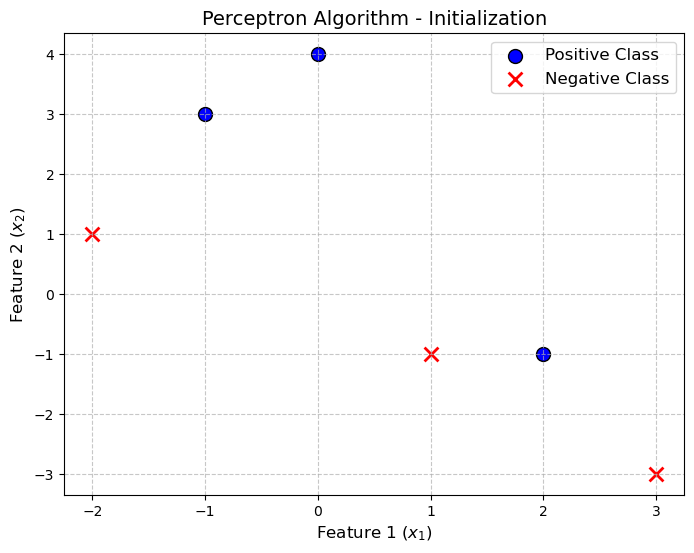

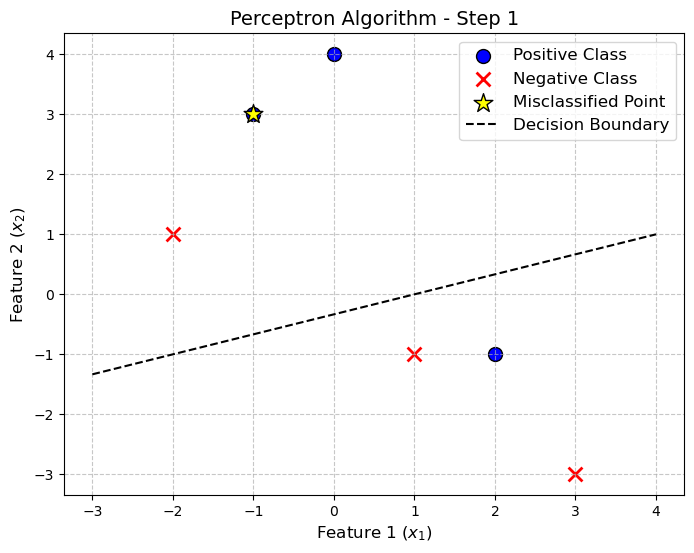

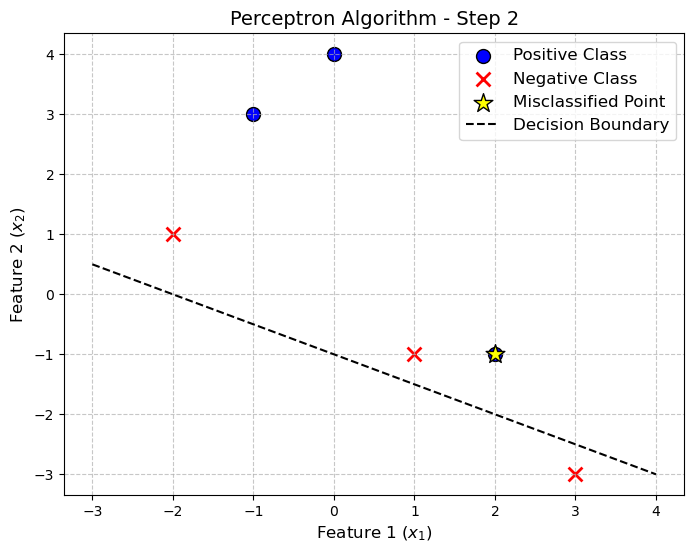

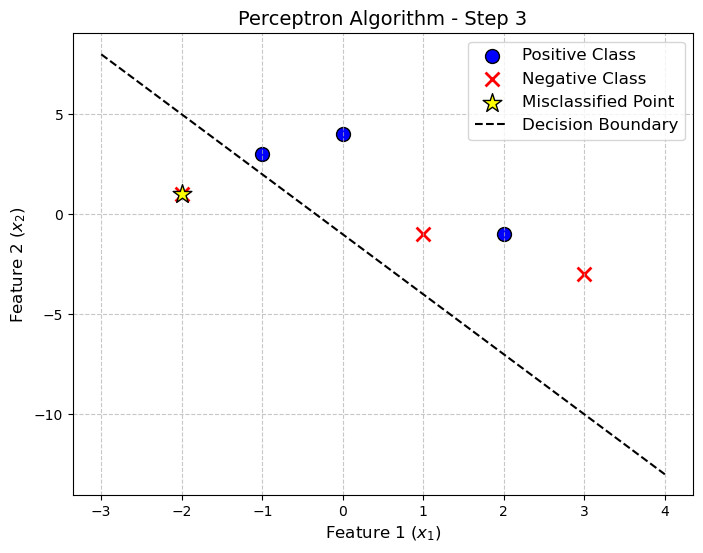

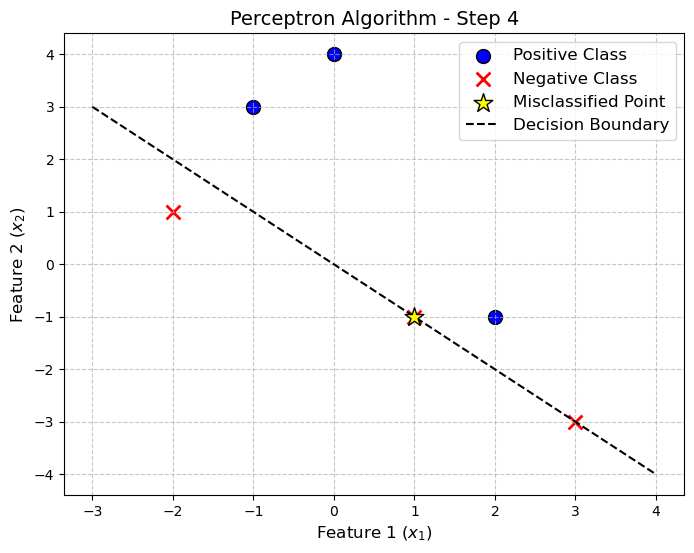

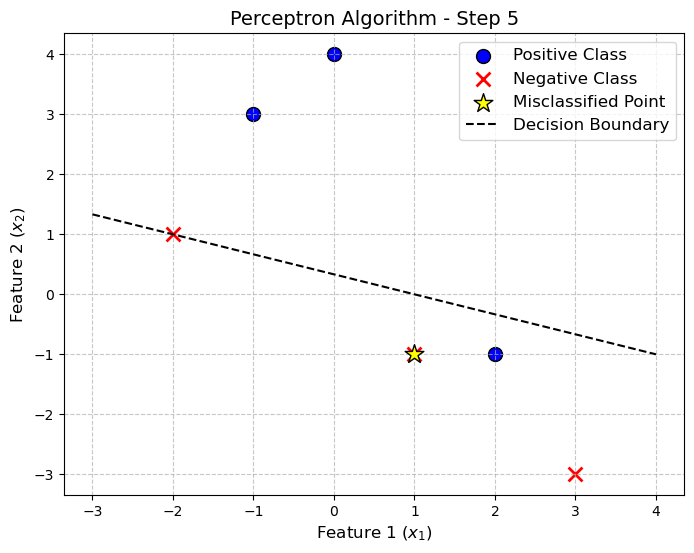

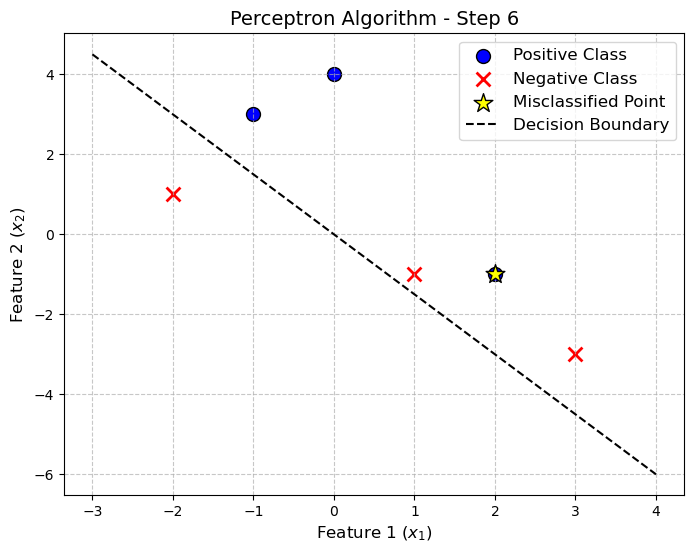

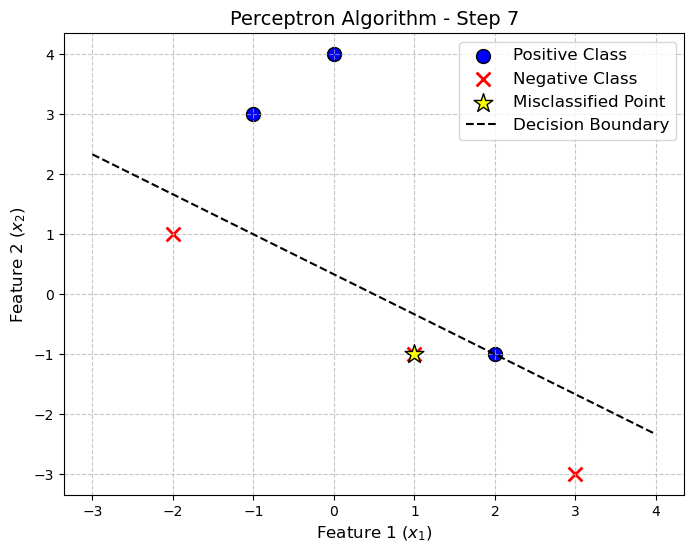

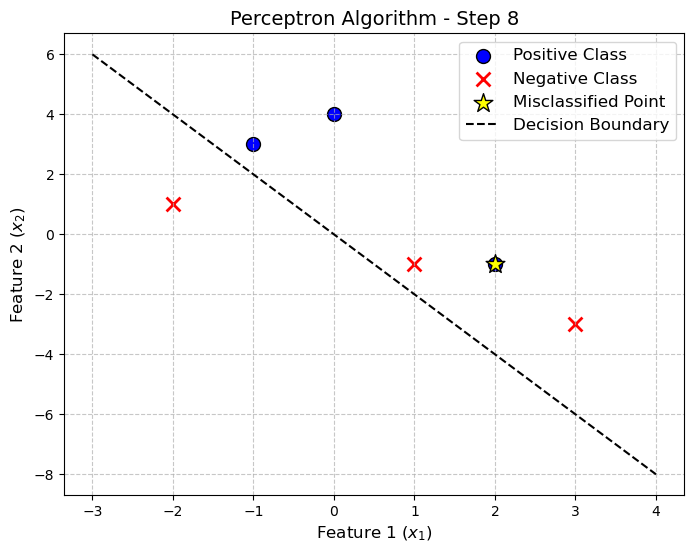

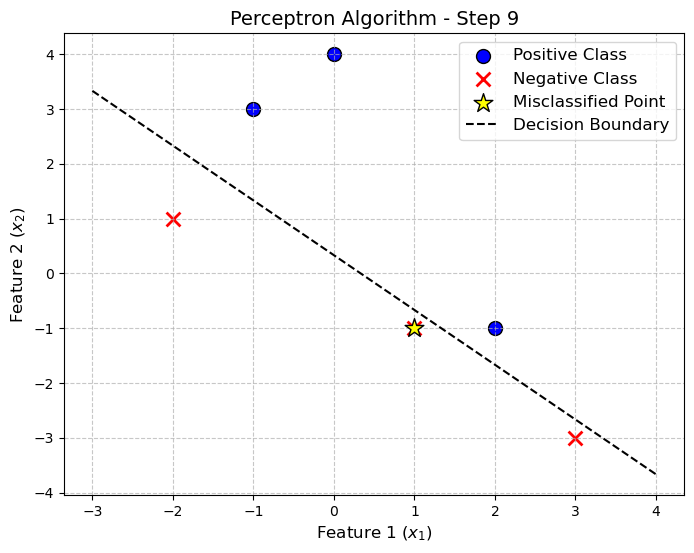

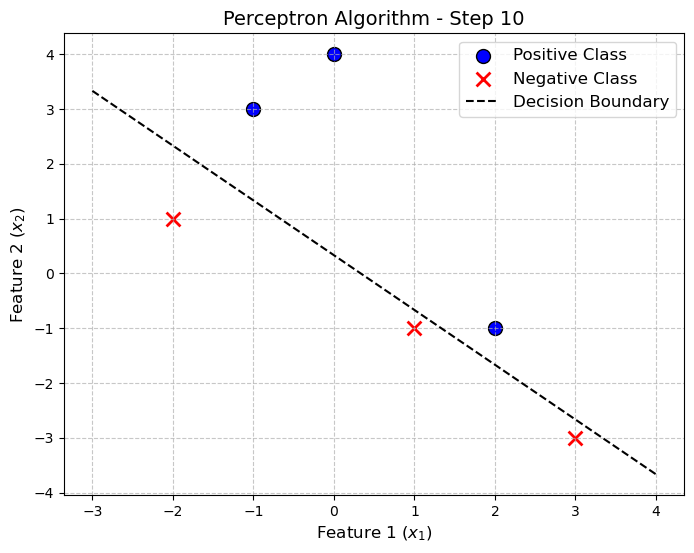

Converged after 10 steps.


(array([3., 3.]), -1)

In [54]:
perceptron(X, y, steps=20)